# Regresión lineal simple

In [1]:
df = read.csv("Salary_Data.csv")

In [2]:
# importo libreria que hay que usar
library(caTools)

In [3]:
# dividir los conjuntos 
set.seed(123)
split = sample.split(df$Salary, SplitRatio=2/3)
trainSet = subset(df, split == TRUE)
testSet = subset(df, split == FALSE)

## Modelo regresión lineal

In [4]:
regresion = lm(formula = Salary ~ YearsExperience, data=trainSet)
summary(regresion)


Call:
lm(formula = Salary ~ YearsExperience, data = trainSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


In [5]:
prediccion_datos_y = predict(regresion, newdata = testSet)
prediccion_datos_y

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

## graficar los datos

In [6]:
# importo libreria pa graficar en R
library(ggplot2)

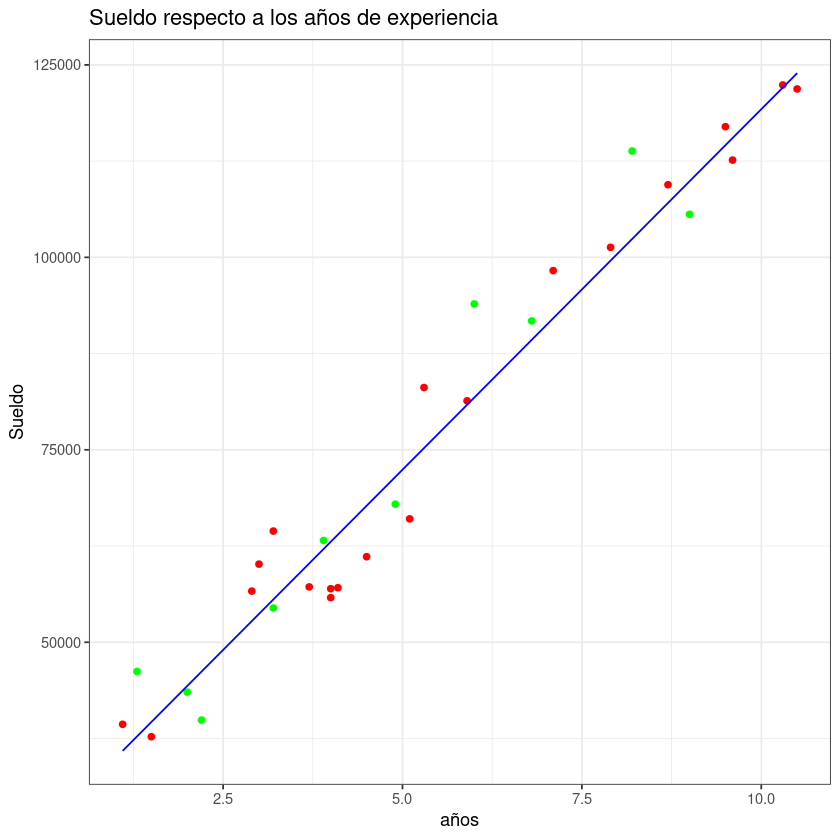

In [17]:
# ggplot es el plt de R, geom_point=scatter y geom_line=plot, tambien le puse titulo y labels
gg <-ggplot() +
    geom_point(aes(x = trainSet$YearsExperience, y = trainSet$Salary), 
                colour = "red") +
    geom_point(aes(x = testSet$YearsExperience, y = testSet$Salary), 
                colour = "green") +
    geom_line(aes(x = trainSet$YearsExperience, y = predict(regresion, newdata=trainSet)),
                colour = "blue") +
    ggtitle("Sueldo respecto a los años de experiencia") +
    xlab("años") +
    ylab("Sueldo")
plot(gg)